## Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## reading data

In [11]:
train = pd.read_csv('Dataset/train_clean.csv')
test = pd.read_csv('Dataset/test_clean.csv')
train.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Life_expectancy
0,-1.229155,1.347790,1.444716,1.667362,-0.984910,-0.322375,-0.742607,-1.299421,-2.292760,-2.320385,...,0,0,0,0,0,0,0,0,0,53.7
1,1.586825,-1.301510,-1.215595,-0.959561,-0.043598,0.999495,1.156882,0.254490,0.906471,0.918252,...,0,0,1,0,0,0,0,0,0,78.6
2,-1.445769,-1.339502,-1.273397,-1.037472,1.784384,-0.175500,0.776984,0.483006,0.582498,0.672280,...,1,0,0,1,0,0,0,0,0,79.4
3,0.936983,0.504701,0.519060,2.370735,0.594705,-1.277058,-1.339590,0.940039,-1.523325,-1.869436,...,0,0,0,0,0,0,0,0,0,60.1
4,-1.445769,0.271813,0.150413,0.138674,-0.031180,0.044811,0.125731,0.437303,0.258525,0.262326,...,0,0,1,0,0,0,0,0,0,69.7


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  2196 non-null   float64
 1   Infant_deaths                         2196 non-null   float64
 2   Under_five_deaths                     2196 non-null   float64
 3   Adult_mortality                       2196 non-null   float64
 4   Alcohol_consumption                   2196 non-null   float64
 5   Hepatitis_B                           2196 non-null   float64
 6   Measles                               2196 non-null   float64
 7   BMI                                   2196 non-null   float64
 8   Polio                                 2196 non-null   float64
 9   Diphtheria                            2196 non-null   float64
 10  Incidents_HIV                         2196 non-null   float64
 11  GDP_per_capita   

## splitting the data

In [14]:
X_train, X_test, Y_train, Y_test = train.drop('Life_expectancy', axis=1), test.drop('Life_expectancy', axis=1), train['Life_expectancy'], test['Life_expectancy']

## training & assessing the model

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Accuracy: 98.64%
Mean Squared Error: 1.4268893377882557
R^2 Score: 0.9771989729869917


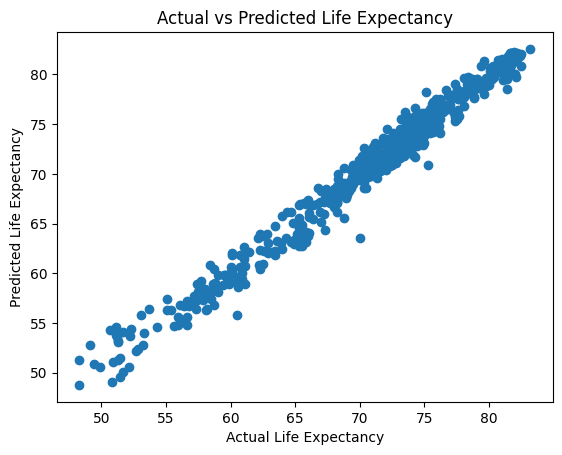

In [16]:
accuracy = np.mean(1 - np.abs((Y_test - Y_pred) / Y_test))
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

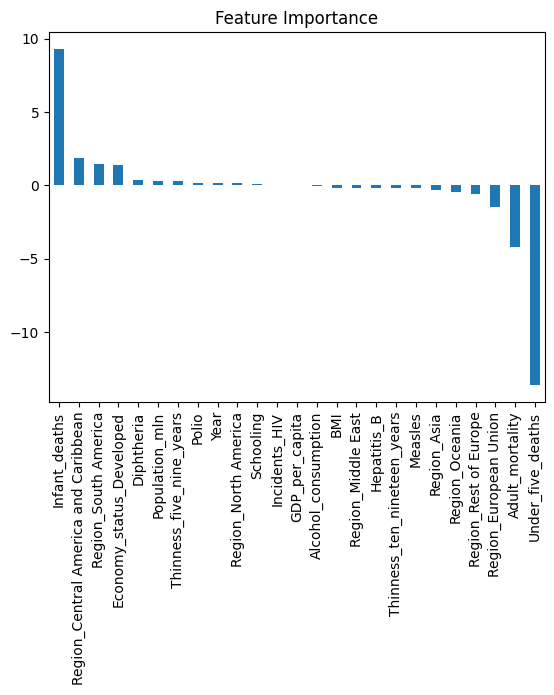

In [18]:
feature_importance = pd.Series(
    model.coef_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title('Feature Importance')